## 1.0 Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2.0 Data Ingestion

In [44]:
df_raw = pd.read_csv('data/25-10-2022_updated.csv', parse_dates=['DT_CARREGAMENTO'])
df_raw.head()

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS
0,2018-10-09,LDC Brasil,19
1,2018-10-10,LDC Brasil,191
2,2018-10-11,LDC Brasil,189
3,2018-10-12,LDC Brasil,84
4,2018-10-13,LDC Brasil,51


## 3.0 Data Quality

### 3.1 Check NAN values

In [45]:
df_raw.isna().sum().sum()

0

### 3.2 Check negative number of freights

In [46]:
df_raw[df_raw['VOLUME_VIAGENS'] < 0].size

0

### 3.3 Check data types

In [47]:
df_raw.dtypes

DT_CARREGAMENTO    datetime64[ns]
NOME_EMBARCADOR            object
VOLUME_VIAGENS              int64
dtype: object

### 3.4 Check embarcadores

In [48]:
df_raw['NOME_EMBARCADOR'].value_counts()

LDC Brasil                                            1477
Amaggi                                                1174
Amaggi Louis Dreyfus Zen-noh Grãos S.A                 727
SIERENTZ AGRO BRASIL LTDA.                              75
ADM DO BRASIL LTDA                                      65
Suporte Carguero Embarcador 1 QA                        59
G10 TRANSPORTES S.A                                     16
FRIBON TRANSPORTES LTDA PILOTO                          15
LDC Pluma                                               10
YNOVA TRANSPORTES E LOGÍSTICA LTDA                       4
ETC - Rodrigo Honorato Ferreira - Solucoes Logisti       2
Publicacao Nuvem                                         1
Rodolider Embarcador                                     1
Sul Transportes                                          1
S E TRANSPORTES E REPRESENTACOES LTDA                    1
Name: NOME_EMBARCADOR, dtype: int64

In [49]:
df_raw['NOME_EMBARCADOR'] = df_raw['NOME_EMBARCADOR'].replace('Amaggi Louis Dreyfus Zen-noh Grãos S.A', 'ALZ')

## 4.0 Data Description

In [50]:
df_stats = df_raw.copy()

### 4.1 Temporal features

In [51]:
df_stats['year'] = df_stats['DT_CARREGAMENTO'].dt.year
df_stats['month'] = df_stats['DT_CARREGAMENTO'].dt.month
df_stats['weekofyear'] = df_stats['DT_CARREGAMENTO'].dt.isocalendar().week
df_stats['day'] = df_stats['DT_CARREGAMENTO'].dt.day
df_stats['dayofweek'] = df_stats['DT_CARREGAMENTO'].dt.dayofweek

In [52]:
df_stats[(df_stats['NOME_EMBARCADOR']=='LDC Brasil')].sort_values('VOLUME_VIAGENS', ascending=False).head(20)

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS,year,month,weekofyear,day,dayofweek
114,2019-01-31,LDC Brasil,2912,2019,1,5,31,3
226,2019-05-23,LDC Brasil,2663,2019,5,21,23,3
210,2019-05-07,LDC Brasil,2453,2019,5,19,7,1
115,2019-02-01,LDC Brasil,2441,2019,2,5,1,4
129,2019-02-15,LDC Brasil,2030,2019,2,7,15,4
290,2019-07-16,LDC Brasil,1864,2019,7,29,16,1
231,2019-05-28,LDC Brasil,1597,2019,5,22,28,1
128,2019-02-14,LDC Brasil,1485,2019,2,7,14,3
121,2019-02-07,LDC Brasil,1432,2019,2,6,7,3
269,2019-06-28,LDC Brasil,1420,2019,6,26,28,4


### 4.2 

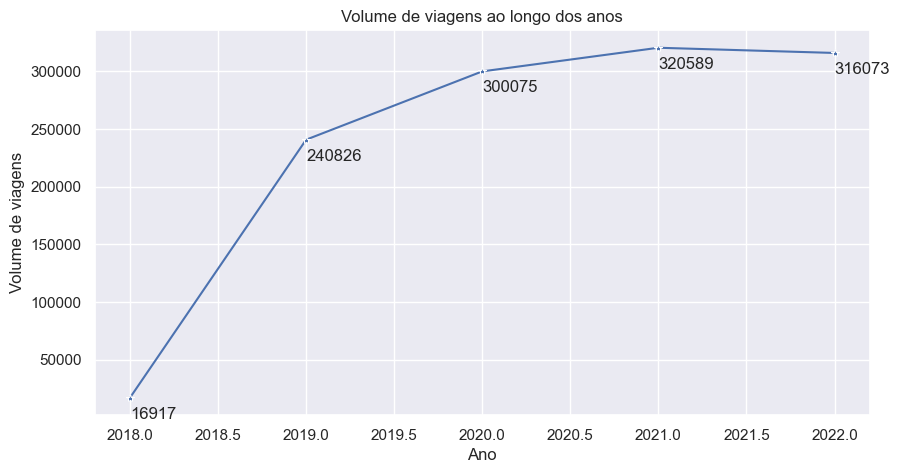

In [53]:
sns.set(rc={'figure.figsize':(10,5)})

col = 'VOLUME_VIAGENS'

df_aux = df_stats[['year', col]].groupby('year').sum().reset_index()

sns.lineplot(data=df_aux, x='year', y='VOLUME_VIAGENS', marker='*');

for x, y in zip(df_aux['year'], df_aux['VOLUME_VIAGENS']):
    plt.text(x = x, y = y-18000, s = '{:.0f}'.format(y))

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Volume de viagens')
plt.show();

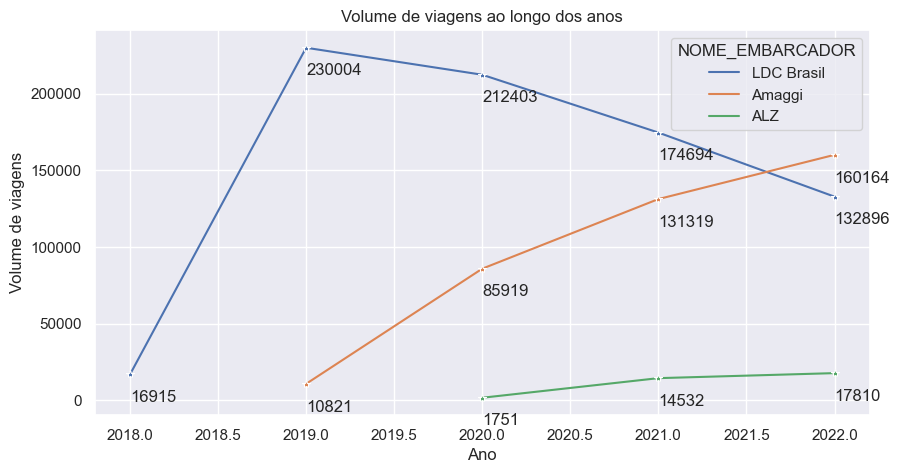

In [54]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['LDC Brasil', 'Amaggi', 'ALZ']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'NOME_EMBARCADOR', col]].groupby(['year', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux, x='year', y='VOLUME_VIAGENS', marker='*', hue='NOME_EMBARCADOR');

for x, y in zip(df_aux['year'], df_aux['VOLUME_VIAGENS']):
    plt.text(x = x, y = y-18000, s = '{:.0f}'.format(y))

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Volume de viagens')
plt.show();

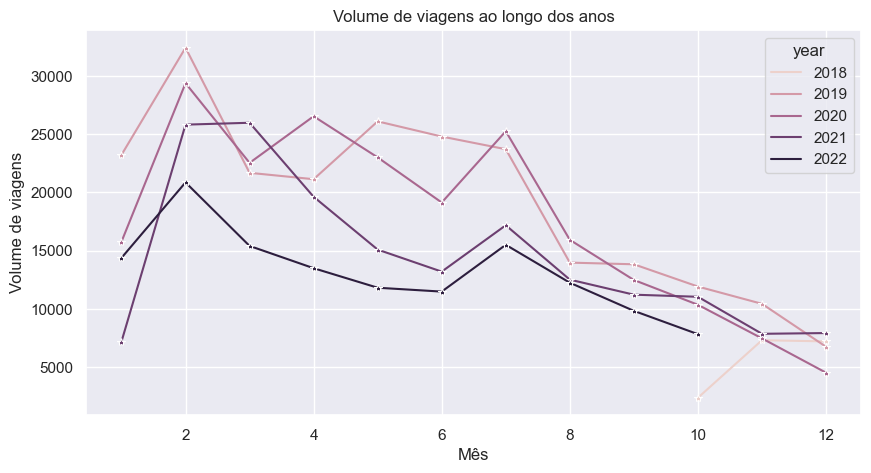

In [55]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['LDC Brasil']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux, x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

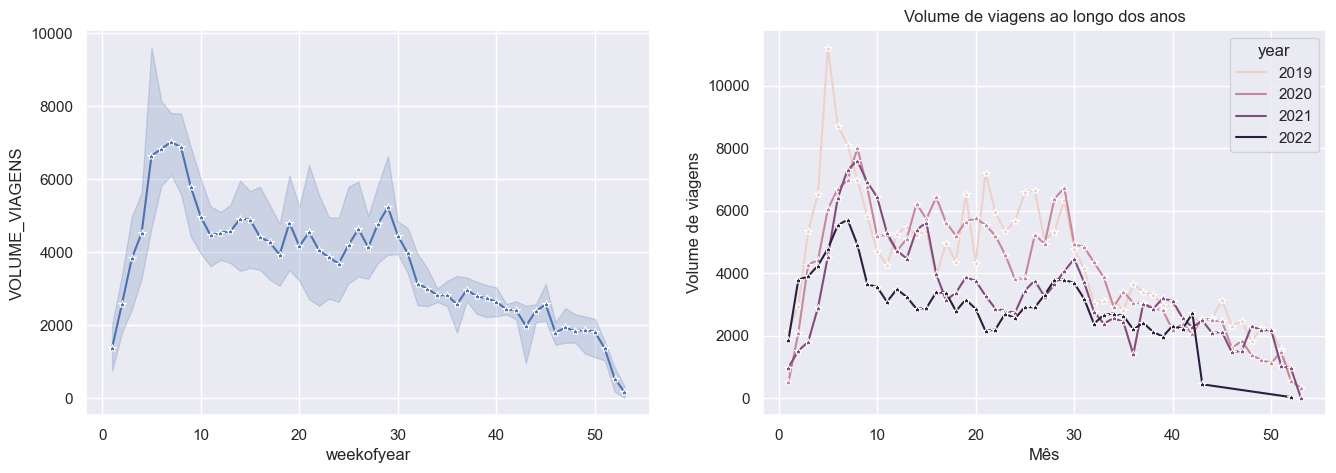

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['LDC Brasil']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()


sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

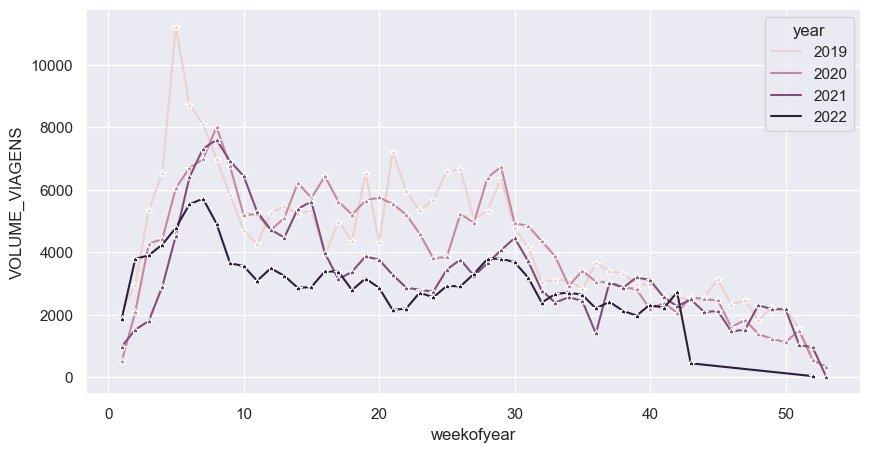

In [57]:
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.show()

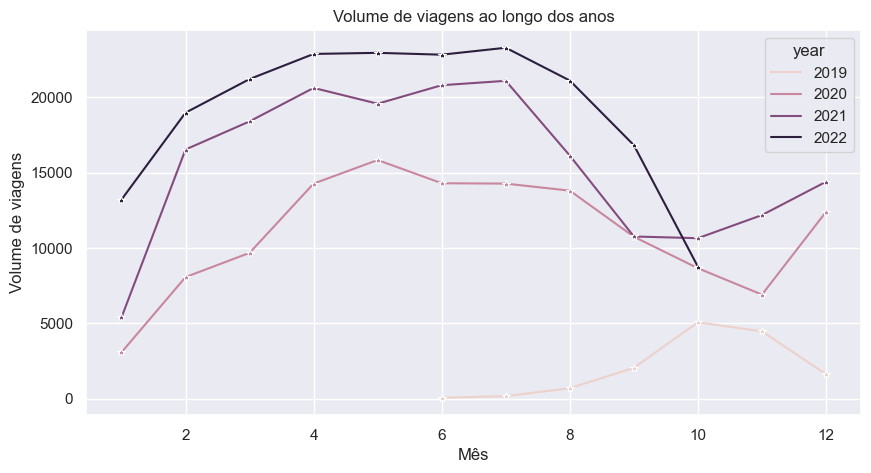

In [17]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['Amaggi']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux[df_aux['year']>2018], x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

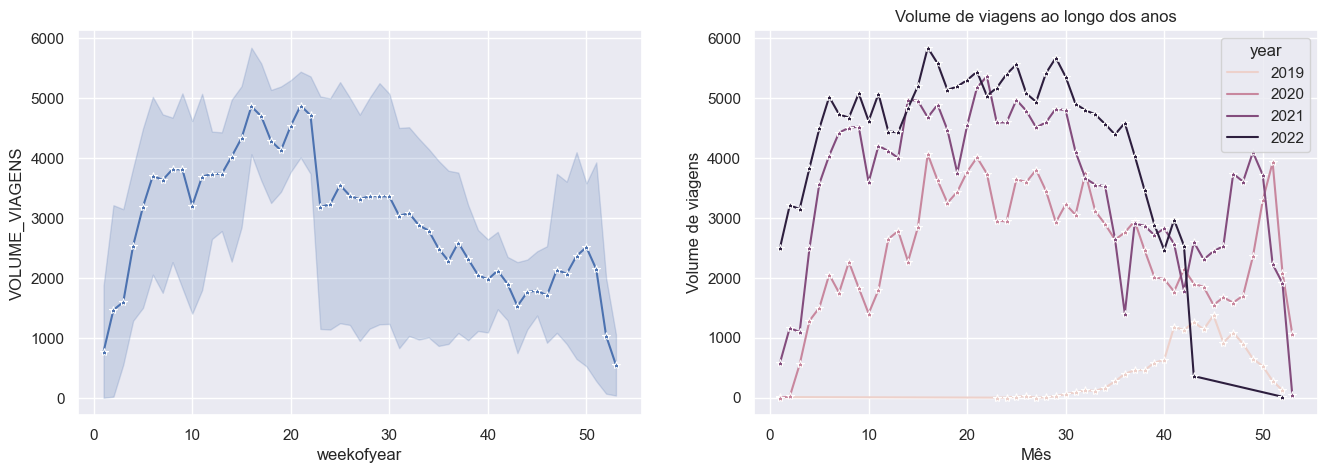

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['Amaggi']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()

sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

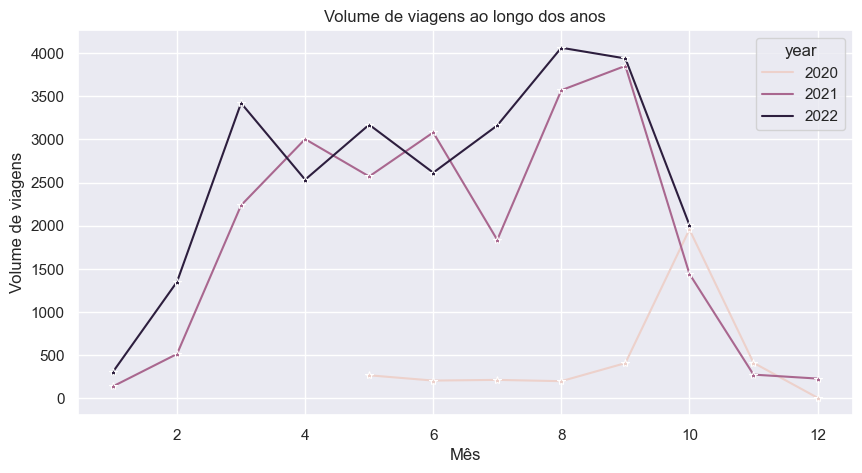

In [19]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['ALZ']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux[df_aux['year']>2018], x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

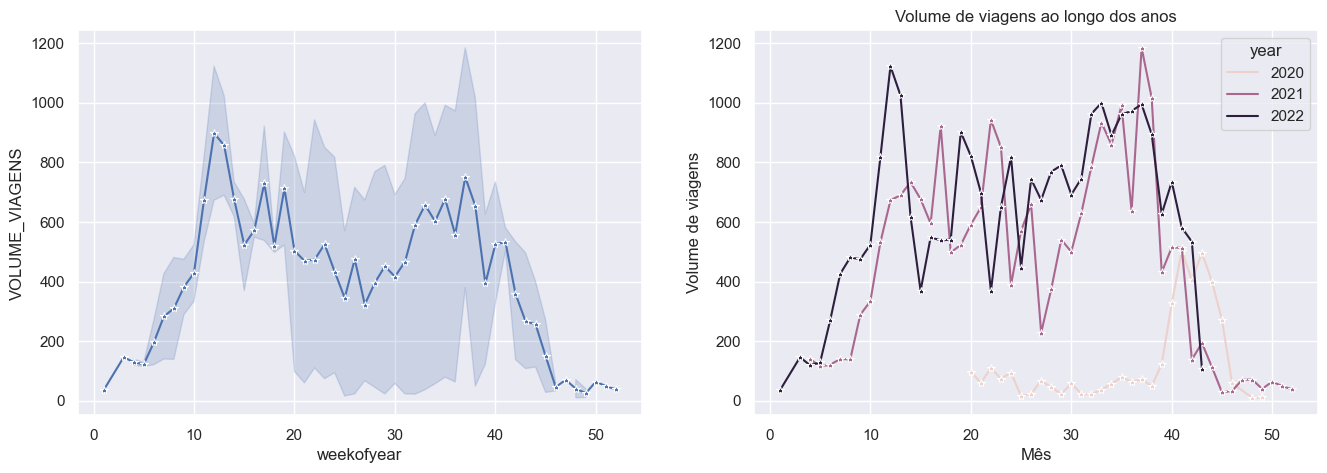

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['ALZ']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()

sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

## 5.0 Data Preparation 

In [59]:
df_pp = df_raw[(df_raw['DT_CARREGAMENTO']>='2020-10-09') & (df_raw['DT_CARREGAMENTO']<='2022-10-25') & (df_raw['NOME_EMBARCADOR']=='LDC Brasil')].copy()
df_pp.head()

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS
1291,2020-10-09,LDC Brasil,482
1294,2020-10-10,LDC Brasil,152
1297,2020-10-11,LDC Brasil,34
1300,2020-10-12,LDC Brasil,56
1303,2020-10-13,LDC Brasil,355


In [60]:
df_pp = df_pp.set_index('DT_CARREGAMENTO')
df_pp.index = pd.DatetimeIndex(df_pp.index).to_period('W')

In [61]:
df_pp = df_pp.drop(columns=['NOME_EMBARCADOR'])

## 6.0 Modeling

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [91]:
model = SimpleExpSmoothing(endog=df_pp['VOLUME_VIAGENS'])
model_fitted = model.fit()

In [92]:
model_fitted.fcastvalues

array([281.32879482])

In [93]:
model_fitted.summary()

Dep. Variable:,VOLUME_VIAGENS,No. Observations:,747
Model:,SimpleExpSmoothing,SSE,30058586.375
Optimized:,True,AIC,7924.138
Trend:,None,BIC,7933.370
Seasonal:,None,AICC,7924.191
Seasonal Periods:,None,Date:,"Tue, 25 Oct 2022"
Box-Cox:,False,Time:,18:17:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1862968,alpha,True
initial_level,469.80810,l.0,True


In [83]:
model_fitted.data.endog

array([ 482,  152,   34,   56,  355,  590,  458,  412,  174,   11,  391,
        486,  619,  456,  422,  145,   47,  527,  531,  389,  447,  375,
        164,   56,  100,  389,  816,  452,  426,  225,   47,  332,  409,
        336,  206,  209,   82,   24,  280,  392,  380,  361,  245,   98,
         74,  208,  352,  242,  204,  232,  104,   32,  162,  322,  247,
        211,  153,   91,   34,  115,  172,  303,  204,  172,  112,   42,
        134,  448,  200,  147,  452,   74,   32,   93,  247,  134,   23,
          2,   25,   15,   80,  114,  118,   15,    3,    6,    1,  117,
        198,  125,  126,  197,  172,   43,  137,  203,  163,  495,  293,
        175,   47,  215,  197,  299,  527,  300,  177,   84,  234,  459,
        529,  502,  516,  402,  256,  559,  610,  574,  716,  992,  622,
        456,  798,  945, 1136, 1013, 1004,  802,  694,  912, 1051,  973,
       1114, 1153, 1161,  943,  996, 1249, 1301, 1261, 1117, 1115,  552,
        886, 1093, 1330, 1102, 1012,  885,  604,  8

In [80]:
print('coefficients', model_fitted.params)

start = df_raw['DT_CARREGAMENTO'].iloc[-1]
df_aux_range = pd.date_range(start, periods=10)#.to_period('W')

predictions = model_fitted.predict(start=df_pp.index[0], end=df_pp.index[-1]+10)

df_predictions = pd.DataFrame(predictions).reset_index()

df_predictions = pd.DataFrame(predictions).reset_index()
df_predictions.columns = ['week', 'pred']

print(df_predictions)

coefficients {'smoothing_level': 0.18629683296812624, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 469.80809850790223, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                      week        pred
0    2020-10-05/2020-10-11  469.808099
1    2020-10-12/2020-10-18  472.079411
2    2020-10-19/2020-10-25  412.449631
3    2020-10-26/2020-11-01  341.945663
4    2020-11-02/2020-11-08  288.674892
..                     ...         ...
113  2022-12-05/2022-12-11  382.709863
114  2022-12-12/2022-12-18  386.303554
115  2022-12-19/2022-12-25  362.028415
116  2022-12-26/2023-01-01  398.723597
117  2023-01-02/2023-01-08  438.083722

[118 rows x 2 columns]


<AxesSubplot: xlabel='DT_CARREGAMENTO'>

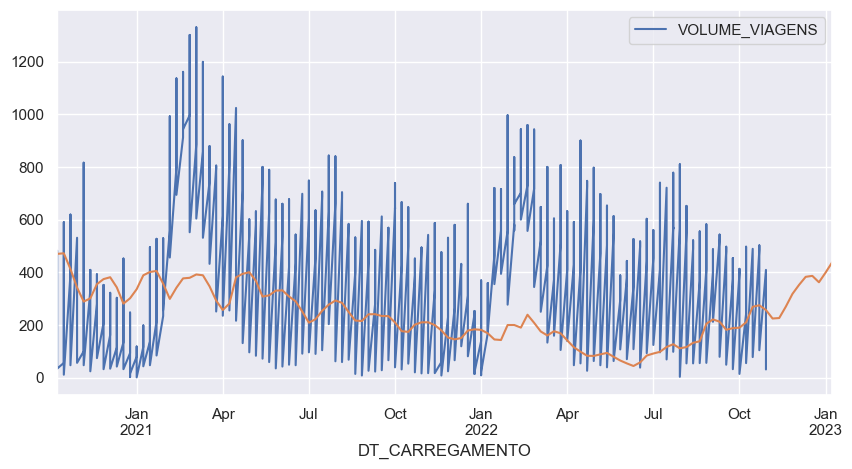

In [78]:
df_pp.plot()
predictions.plot()

<AxesSubplot: >

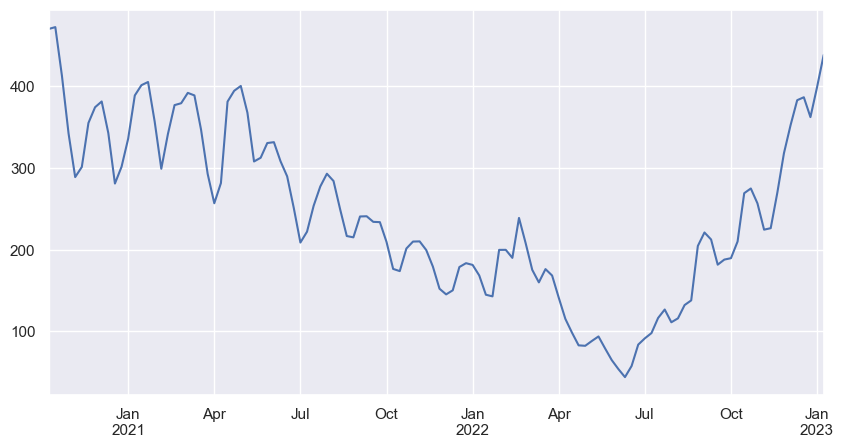

In [40]:
model_fitted.fittedfcast

array([ 599.5656566 ,  632.08076325,  585.24633153,  521.89516718,
        484.52997458,  509.46758272,  562.34807719,  572.41143533,
        587.12212992,  545.73609106,  480.72351589,  513.88273301,
        552.60768816,  595.35988554,  606.88491317,  621.00053751,
        570.85123151,  506.48844935,  547.12815862,  585.95348864,
        592.87681146,  613.64460561,  625.13175925,  580.81795895,
        517.92284303,  502.63559474,  528.62332783,  649.19122247,
        668.98604019,  684.01936532,  636.79403533,  565.1226602 ,
        576.28017845,  593.66876993,  587.59382602,  553.59426443,
        520.39277558,  474.84705782,  418.59916323,  413.06556591,
        435.67055738,  446.35612782,  445.77666767,  437.29297785,
        407.85617827,  365.57436389,  368.42444148,  393.6421315 ,
        406.32681084,  407.74657812,  416.95879588,  394.88265112,
        349.67083475,  354.10434171,  384.81850752,  401.6034021 ,
        399.12874328,  392.99261287,  363.06368103,  326.47420

In [39]:
model_fitted.fittedvalues

DT_CARREGAMENTO
2020-10-05/2020-10-11    599.565657
2020-10-05/2020-10-11    632.080763
2020-10-05/2020-10-11    585.246332
2020-10-12/2020-10-18    521.895167
2020-10-12/2020-10-18    484.529975
                            ...    
2022-10-17/2022-10-23    565.683166
2022-10-17/2022-10-23    586.210676
2022-10-17/2022-10-23    566.628440
2022-10-24/2022-10-30    514.932369
2022-10-24/2022-10-30    528.775637
Freq: W-SUN, Length: 747, dtype: float64

In [ ]:
#plt.plot(df_pp.index, df_pp, label='Train')
#plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Holt-Winters')
plt.legend(loc='best')